# AIRBNB

In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#se carga archivo
data = pl.read_csv("listings.csv")
#se muestra la base de datos
data

id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,…,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
i64,str,i64,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,str,str,str,str,str,f64,f64,str,str,i64,f64,str,…,i64,i64,i64,i64,i64,f64,f64,str,str,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,str,str,f64,f64,f64,f64,f64,f64,f64,str,str,i64,i64,i64,i64,f64
35797,"""https://www.airbnb.com/rooms/3…",20250319150644,"""2025-03-21""","""city scrape""","""Villa Dante""","""Dentro de Villa un estudio de …","""Santa Fe Shopping Mall, Interl…","""https://a0.muscache.com/pictur…",153786,"""https://www.airbnb.com/users/s…","""Dici""","""2010-06-28""","""Mexico City, Mexico""","""Master in visual arts, film ph…","""N/A""","""N/A""","""N/A""","""f""","""https://a0.muscache.com/im/pic…","""https://a0.muscache.com/im/pic…",null,1,1,"""['email', 'phone', 'work_email…","""t""","""t""","""Mexico City, D.f., Mexico""","""Cuajimalpa de Morelos""",null,19.38283,-99.27178,"""Entire villa""","""Entire home/apt""",2,1.0,"""1 bath""",…,7,1,1,7,7,1.0,7.0,null,"""t""",28,58,88,363,"""2025-03-21""",0,0,0,284,0,0,0,null,null,null,null,null,null,null,null,null,null,"""f""",1,1,0,0,null
44616,"""https://www.airbnb.com/rooms/4…",20250319150644,"""2025-03-20""","""previous scrape""","""Condesa Haus""","""A new concept of hosting in me…",null,"""https://a0.muscache.com/pictur…",196253,"""https://www.airbnb.com/users/s…","""Fernando""","""2010-08-09""","""Mexico City, Mexico""","""Condesa Haus Rentals offers i…","""within a few hours""","""100%""","""90%""","""f""","""https://a0.muscache.com/im/use…","""https://a0.muscache.com/im/use…","""Condesa""",13,13,"""['email', 'phone', 'work_email…","""t""","""t""",null,"""Cuauhtémoc""",null,19.41162,-99.17794,"""Entire home""","""Entire home/apt""",14,null,"""5.5 baths""",…,365,1,1,365,365,1.0,365.0,null,"""t""",29,59,89,364,"""2025-03-20""",65,1,0,286,0,6,null,"""2011-11-09""","""2025-01-01""",4.59,4.56,4.7,4.87,4.78,4.98,4.47,null,"""f""",9,4,2,0,0.4
56074,"""https://www.airbnb.com/rooms/5…",20250319150644,"""2025-03-20""","""city scrape""","""Great space in historical San …","""This great apartment is locate…","""Very traditional neighborhood …","""https://a0.muscache.com/pictur…",265650,"""https://www.airbnb.com/users/s…","""Maris""","""2010-10-19""","""Mexico City, Mexico""","""I am a University Professor no…","""within a day""","""88%""","""100%""","""f""","""https://a0.muscache.com/im/use…","""https://a0.muscache.com/im/use…","""San Rafael""",1,5,"""['email', 'phone']""","""t""","""t""","""Mexico City, DF, Mexico""","""Cuauhtémoc""",null,19.43977,-99.15605,"""Entire condo""","""Entire home/apt""",2,1.0,"""1 bath""",…,250,15,15,25

In [2]:
data = pl.read_csv("listings.csv")
data = data.with_columns(
    pl.col("price").str.replace_all(r"[$,]", "").cast(pl.Float64, strict=False)
)

data.select("price").head(10)

price
f64
3982.0
null
585.0
null
1015.0
null
3982.0
327.0
605.0


In [3]:
# 1.se calcula el precio promedio
mean_price = data.select(pl.col("price").mean()).to_numpy()[0][0]
print(f"1.Precio promedio: {mean_price:.2f}")

#2. tipos de cuarto mas comunes de mayor a menor representado en una tabla (room_type)
room_type_counts = (
    data.group_by("room_type")
    .agg(pl.len().alias("count"))
    .sort("count", descending=True)
)
print("2.Tipos de cuarto más comunes:")
print(room_type_counts)

#3. alcaldias con mayor cantidad de airbnbs
top_alcaldias = (
    data.group_by("neighbourhood_cleansed")
    .agg(pl.len().alias("count"))
    .sort("count", descending=True)
    .head(10)
)
print("3. 10 Alcaldías con mayor cantidad de Airbnbs:")
print(top_alcaldias)

#4. personas con mayor cantidad de airbnbs (host_name)
top_personas = (
    data.group_by("host_name")
    .agg(pl.len().alias("count"))
    .sort("count", descending=True)
    .head(10)
)
print("4. 10 Personas con mayor cantidad de Airbnbs:")
print(top_personas)

1.Precio promedio: 1665.01
2.Tipos de cuarto más comunes:
shape: (4, 2)
┌─────────────────┬───────┐
│ room_type       ┆ count │
│ ---             ┆ ---   │
│ str             ┆ u32   │
╞═════════════════╪═══════╡
│ Entire home/apt ┆ 17163 │
│ Private room    ┆ 8646  │
│ Shared room     ┆ 170   │
│ Hotel room      ┆ 88    │
└─────────────────┴───────┘
3. 10 Alcaldías con mayor cantidad de Airbnbs:
shape: (10, 2)
┌────────────────────────┬───────┐
│ neighbourhood_cleansed ┆ count │
│ ---                    ┆ ---   │
│ str                    ┆ u32   │
╞════════════════════════╪═══════╡
│ Cuauhtémoc             ┆ 12030 │
│ Miguel Hidalgo         ┆ 4441  │
│ Benito Juárez          ┆ 2989  │
│ Coyoacán               ┆ 1693  │
│ Álvaro Obregón         ┆ 1007  │
│ Venustiano Carranza    ┆ 838   │
│ Tlalpan                ┆ 777   │
│ Gustavo A. Madero      ┆ 479   │
│ Cuajimalpa de Morelos  ┆ 424   │
│ Iztacalco              ┆ 421   │
└────────────────────────┴───────┘
4. 10 Personas con mayor c

/tmp/ipykernel_9277/1517792696.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


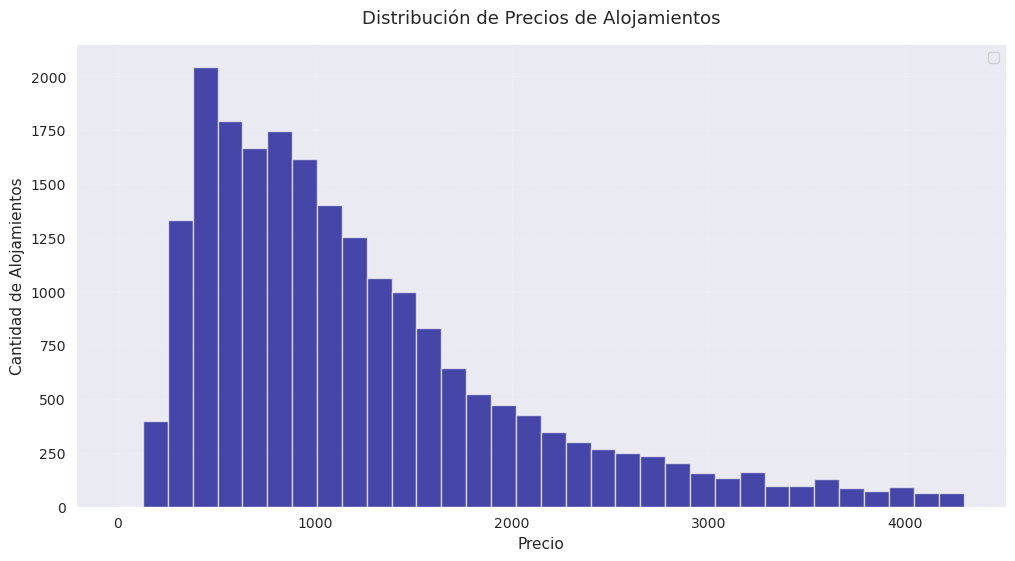

In [4]:
#5. histograma de precios de los alojamientos
fig, ax = plt.subplots(figsize=(12, 6))
prices = data.select("price").to_numpy().flatten()

prices = prices[~np.isnan(prices) & (prices > 0)]
price_limit = np.percentile(prices, 95)
filtered_prices = prices[prices <= price_limit]

n_bins = 35
bins = np.linspace(0, price_limit, n_bins)

ax.hist(filtered_prices,
        bins=bins,
        color='darkblue',
        edgecolor='whitesmoke',
        alpha=0.7)

ax.grid(True, alpha=0.3, linestyle=':')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title("Distribución de Precios de Alojamientos",
            fontsize=13, pad=15)
ax.set_xlabel("Precio", fontsize=11)
ax.set_ylabel("Cantidad de Alojamientos", fontsize=11)

ax.legend()
plt.show()

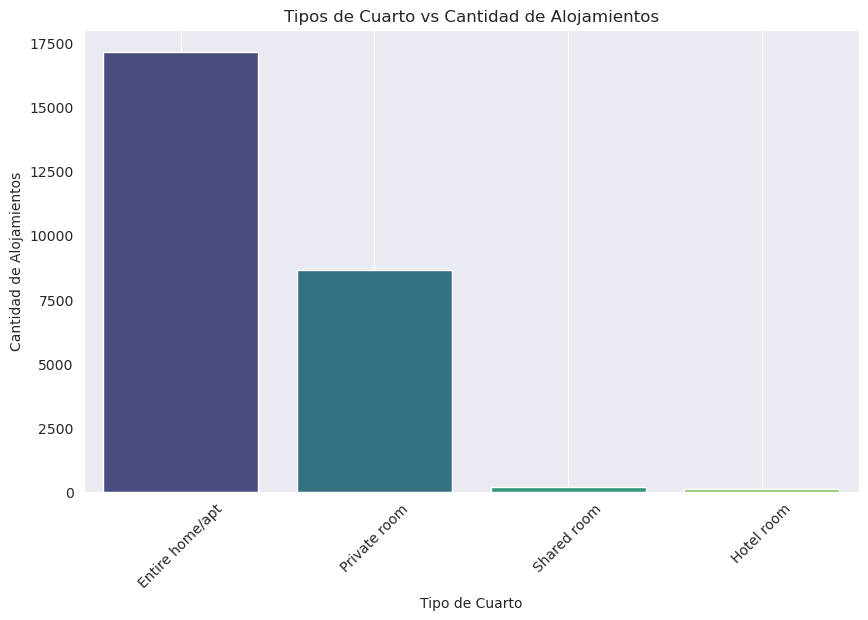

In [5]:
#6.grafica de barras para los tipos de alojamientos vs cantidad de alojamientos totales
plt.figure(figsize=(10, 6))
sns.barplot(
    x=room_type_counts["room_type"].to_list(),
    y=room_type_counts["count"].to_list(),
    hue=room_type_counts["room_type"].to_list(),
    palette="viridis",
    legend=False
)
plt.title("Tipos de Cuarto vs Cantidad de Alojamientos")
plt.xlabel("Tipo de Cuarto")
plt.ylabel("Cantidad de Alojamientos")
plt.xticks(rotation=45)
plt.grid()
plt.show()

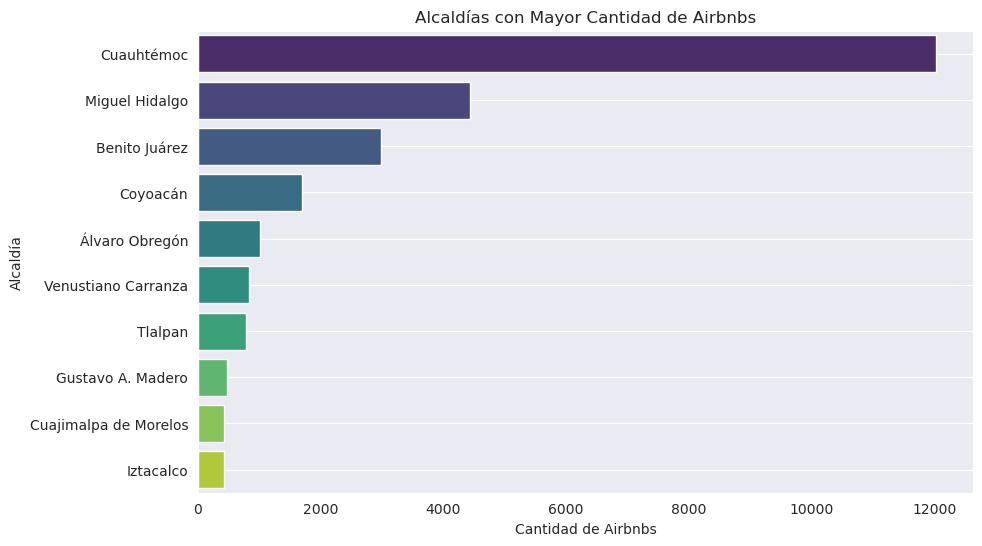

In [6]:
#7. grafica de barras horizontal para las alcaldias con mayor cantidad de airbnbs en espanol los ejes y titulo
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_alcaldias["count"].to_list(),
    y=top_alcaldias["neighbourhood_cleansed"].to_list(),
    hue=top_alcaldias["neighbourhood_cleansed"].to_list(),
    palette="viridis",
    legend=False
)
plt.title("Alcaldías con Mayor Cantidad de Airbnbs")
plt.xlabel("Cantidad de Airbnbs")
plt.ylabel("Alcaldía")
plt.grid()
plt.show()

In [7]:
#8.distribución geográfica de los precios en un mapa
import polars as pl
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

# Hago que el mapa se abra en el notebook
pio.renderers.default = "notebook_connected"

# Limpio la columna de precios para quitarle los signos de '$' y las comas
data = data.with_columns(
    pl.col("price").cast(pl.Utf8).str.replace_all(r"[$,]", "").cast(pl.Float64, strict=False)
)

# Filtro los datos para el mapa
data_map = data.filter(
    (pl.col("price") > 0) &
    # Quito los precios muy altos para que no afecten la vista
    (pl.col("price") <= np.percentile(data["price"].drop_nulls(), 95)) &
    pl.col("latitude").is_not_null() &
    pl.col("longitude").is_not_null()
)

# textos que se verán al pasar el mouse por los puntos
hover_texts = [
    f"Alcaldía: {row[0]}<br>Tipo: {row[1]}<br>Precio: ${row[2]:.2f}"
    for row in data_map.select(["neighbourhood_cleansed", "room_type", "price"]).iter_rows()
]

# Aquí creo la figura donde irá el mapa
fig = go.Figure()

# Le agrego los puntos al mapa
fig.add_trace(go.Scattermap(
    lat=data_map["latitude"],
    lon=data_map["longitude"],
    mode='markers',
    marker=dict(
        size=8,
        color=data_map["price"],
        colorscale='Viridis', # La escala de colores para los puntos
        showscale=True,
        colorbar=dict(
            title="Precio (MXN)"
        )
    ),
    text=hover_texts,
    hoverinfo='text'
))

# Ajusto cómo se va a ver el mapa
fig.update_layout(
    title="Distribución Geográfica de Precios en CDMX",
    map=dict(
        style="open-street-map",
        center=dict(
            lat=data_map["latitude"].mean(),
            lon=data_map["longitude"].mean()
        ),
        zoom=10
    ),
    margin=dict(l=0, r=0, t=30, b=0)
)
fig.show()